## J.C Hull: Options, Futures, And Other Derivatives

### Chapters 1 - 9

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Chapter 1

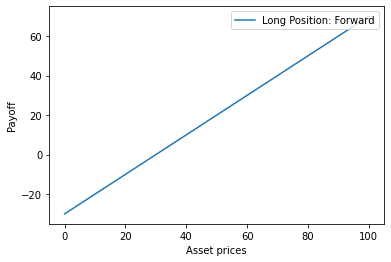

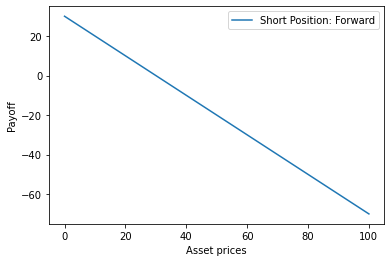

In [5]:
### Payoffs from Forward Contracts

ST = 10 # Spot price of asset at maturity of contract
K = 30 # Delivery Price

# Long Position
Long = ST - K

# Short Position
Short = K - ST


# Example
prices = np.linspace(0,100,100)

Lpayoff = prices - K

Spayoff = K - prices

plt.plot(prices,Lpayoff, label='Long Position: Forward')
plt.legend(loc='upper right')
plt.xlabel("Asset prices")
plt.ylabel("Payoff")
plt.show()

plt.plot(prices,Spayoff, label='Short Position: Forward')
plt.legend(loc='upper right')
plt.xlabel("Asset prices")
plt.ylabel("Payoff")
plt.show()




Forward Contract: Agreement to buy or sell an asset at a certain future time for a certain price.

One of the parties to a forward contract assumes a long position and agrees to buy the underlying asset on a certain specified future date for a certain specified price. The other party assumes a short position and agrees to sell the asset on the same date for the same price.

 ## Chapter 3 Hedging Strategies Using Futures

### Basis Risk

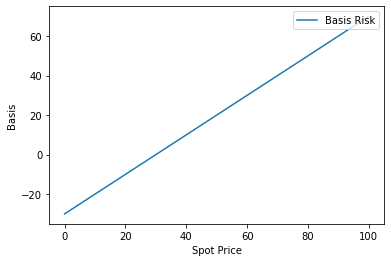

In [3]:
## Basis = Spot Price of Underlying - Future Price of Contract used


Sp = np.linspace(0,100,100)
Fp = 30

Basis = Sp - Fp

plt.plot(Sp,Basis, label='Basis Risk')
plt.legend(loc='upper right')
plt.xlabel("Spot Price")
plt.ylabel("Basis")
plt.show()



An increase in the basis is referred to as a strengthening of the basis; a decrease in the basis is referred to as a weakening of the basis. 

Determine which of the available futures contracts has futures prices
that are most closely correlated with the price of the asset being hedged.

### Cross Hedging

In [ ]:
### Minimum Variance Hedge Ratio: H
# H is the slope of best fit of a linear regression between Spot Prices 
#  and Futures Prices
# The formula for H can be shown as


SpotDev = 0 #Standard Deviation of the Spot prices
FutDev = 0
coefcorrel = 0 # Coefficient of correlation

H = coefcorrel * (SpotDev/FutDev)



The hedge ratio is the ratio of the size of the position taken in futures contracts to the size of the exposure

The hedger should choose a value for the hedge ratio that minimizes the
variance of the value of the hedged position

The hedge effectiveness can be defined as the proportion of the variance that is eliminated by hedging. This is the R^2 from the regression 

### Optimal Number of Contracts

In [ ]:
Qa = 0 # Size of Position being hedged (units)
Qf = 0 # Size of one futures contract (units)
# N = Optimal number of futures contracts for hedging.

N = (H*Qa/Qf)


### Tailing the Hedge

the correlation between percentage one-day changes in the futures and spot prices.

Same equations for Cross Hedging and Optimal number of Contracts, but instead we now used the standard deviations of one day changes to reflect the daily settlement of Futures Contracts

### Hedging An Equity Portfolio

When the portfolio does not mirror the index, we can use the capital asset pricing model

The parameter beta from the capital asset pricing model is the slope of the best-fit line obtained when excess return on the portfolio over the risk-free rate is regressed against the excess return of the index over the risk-free rate

A hedge using index futures removes the risk arising from market moves and leaves the hedger exposed only to the performance of the portfolio relative to the market

In [2]:
# If the portfolio mirrors an index, then we can use futures contracts on
#  the index

Pv = 1 # Current Portfolio Value
Fv = 1 # Current value of one Futures Contract

Np = Pv/Fv

## Not mirroring

NpAdj = beta*(Pv/Fv)


## Chapter 4 Interest Rates

### Measuring IR: Compound Interest

In [6]:
# Terminal Value of an Investment

A = 1 # Principal
R = 1 # Rate
n = 1 # Number of years invested at
m = 1 # When the rate is compounded m times in a single year

TV = A*(1+(R/m))**(m*n)

# Or by Continuous Compounding

Tvc = A*np.exp(R*n)


In [8]:
## Converting rate of a compounding freq of m times per annum to a 
#  continuously compounded rate

def RateConvert(R,m,rtype):
    # 1 for compounding rate -> goes to continuous rate
    # 2 for continuous rate -> goes to compounding rate
    
    if rtype == 1:
        r = m*np.log(1+R/m)
    elif rtype == 2:
        r = m*(np.exp(R/m)-1)
    
    return r
    
    
    


### Foward Rates

Forward interest rates are the future rates of interest implied by current zero rates for periods of time in the future

In [10]:

R2 = 1 # Zero rate for maturity T2
R1 = 1 # Zero rate for maturity T1

T1 = 1 # Maturity for R1
T2= 2 # maturity for R2

# Forward Rate
Rf = (R2*T2 - R1*T1)/(T2-T1)




### Forward Rate Agreements

In [ ]:
### Work in Progress

### Bond Duration / Modified Duration

### Convexity

## Chapter 5 Determination of Forward and Futures Prices

In [7]:
### Notation

# T = 1 # Time until Delivery Date (Years)
# S0 = 1 # Price of asset underlying the forward or futures contract
# F0 = 1 # Forward or Futures price today
# r = 1 #  Zero-coupon risk-free rate of interest per annum

# Forward Price Today on asset that provides no income

def forward1(S0,r,T):
    F0 = S0*np.exp(r*t)
    
    return F0

### Arbitrage opportunities are only possible when
#       F0 is not equal to S0e^(rT)


### With Income that is perfectly predictable

# I = 1 # Present Value of Income during life of forward contract

def forward2(S0,r,T,I):
    F0 = (S0 - I)*np.exp(r*t)
    
    return F0

### Known Yield
#  income is known when expressed as a percentage of the 
#  asset’s price at the time the income is paid 
# q = 1 # Avg yield per annum on underlying during life of forward contract

def forwardYield(S0,r,T,q):
    F0 = (S0 - I)*np.exp((r - q)*t)
    
    return F0

def forwardCurrency(S0,r,T,rf):
    # rf is the foreign risk free rate
    F0 = (S0 - I)*np.exp((r - rf)*t)
    
    return F0



### Valuing Forward Contracts

The value of a forward contract at the time it is first entered into is close to zero. At a later stage, it may prove to have a positive or negative value. It is important for banks and other financial institutions to value the contract each day

K is the delivery price for a contract that was negotiated some time ago

The variable F0 is the forward price that would be applicable if we negotiated the contract today

At the beginning of the life of the forward contract, the delivery price, K, is set equal to the forward price at that time and the value of the contract, f, is 0. As time passes, K stays the same 


In [8]:


def ForwardVal(S0,r,T,K):
    # No income
    f = S0 - K*np.exp(-rT)
    return f

def ForwardVal2(S0,r,T,K,I):
    # Income
    f = S0 - I - K*np.exp(-rT)
    return f

def ForwardValYield(S0,r,T,K,q):
    # Income
    f = S0*np.exp(-q*T) - K*np.exp(-rT)
    return f


when S is strongly positively correlated with interest rates, futures prices will tend to be slightly higher than forward prices. When S is strongly negatively correlated with interest rates, a similar argument shows that
forward prices will tend to be slightly higher than futures prices.


### The Risk in a Futures Position
No systematic risk k = r , F0 = E(ST) (Asset is uncorrelated with market)

Positive systematic risk k > r , F0 < E(ST) (Asset is +ve correlated with market)

Negative systematic risk k < r , F0 > E(ST) (Asset is -ve correlated with market)

futures price is an unbiased estimate of the expected future spot
price when the return from the underlying asset is uncorrelated with the stock
market.

## Chapter 7 Swaps

## Chapter 8 Securitization and Credit Crisis of 2007

## Chapter 9 OIS Discounting, Credit Issues, and Funding Costs